In [1]:
# csv_download: https://tianchi.aliyun.com/datalab/dataSet.html?spm=5176.100073.0.0.7f5b6fc1zmnR6r&dataId=2581

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read data
data_01 = pd.read_csv('/home/steve/PycharmProjects/AI_Learning/AliTianChi/数据分析进阶/pandas实践/data_01.csv')
data_02 = pd.read_csv('/home/steve/PycharmProjects/AI_Learning/AliTianChi/数据分析进阶/pandas实践/data_02.csv')
data_03 = pd.read_csv('/home/steve/PycharmProjects/AI_Learning/AliTianChi/数据分析进阶/pandas实践/data_03.csv')

# merge data
data = pd.concat([data_01, data_02, data_03])

# 各字段含义
# 
# cand_nm – 接受捐赠的候选人姓名
# contbr_nm – 捐赠人姓名
# contbr_st – 捐赠人所在州
# contbr_employer – 捐赠人所在公司
# contbr_occupation – 捐赠人职业
# contb_receipt_amt – 捐赠数额（美元）
# contb_receipt_dt – 收到捐款的日期


In [2]:
# 查看前5行数据
data.head()


,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11


In [3]:
# 查看数据的信息，包括每个字段的名称、非空数量、字段的数据类型
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 7 columns):
cand_nm              1001733 non-null object
contbr_nm            1001733 non-null object
contbr_st            1001729 non-null object
contbr_employer      988004 non-null object
contbr_occupation    993303 non-null object
contb_receipt_amt    1001733 non-null float64
contb_receipt_dt     1001733 non-null object
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


In [4]:
# 用统计学指标快速描述数据的概要
data.describe()


,contb_receipt_amt
count,1.001733e+06
mean,2.982358e+02
std,3.749663e+03
min,-3.080000e+04
25%,3.500000e+01
50%,1.000000e+02
75%,2.500000e+02
max,2.014491e+06


In [5]:
# 从data.info()得知，contbr_employer、contbr_occupation均有少量缺失值,均填充为NOT PROVIDED
data['contbr_employer'].fillna('NOT PROVIDED', inplace=True)
data['contbr_occupation'].fillna('NOT PROVIDED', inplace=True)
# 修改一个对象时：
#                inplace=True：不创建新的对象，直接对原始对象进行修改；
#                inplace=False：对数据进行修改，创建并返回新的对象承载其修改结果。


In [6]:
# 从data.info()得知，contbr_employer、contbr_occupation均有少量缺失值,均填充为NOT PROVIDED
data['contbr_employer'].fillna('NOT PROVIDED', None, None, True)
data['contbr_occupation'].fillna('NOT PROVIDED', None, None, True)
# 修改一个对象时：
#                inplace=True：不创建新的对象，直接对原始对象进行修改；
#                inplace=False：对数据进行修改，创建并返回新的对象承载其修改结果。


In [9]:
# 查看数据中总统候选人都有谁
print('共有{}位候选人，分别是'.format(len(data['cand_nm'].unique())))
data['cand_nm'].unique()


共有13位候选人，分别是


array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [10]:
# 通过搜索引擎等途径，获取到每个总统候选人的所属党派，建立字典parties，候选人名字作为键，所属党派作为对应的值
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}


In [12]:
# 通过map映射函数，增加一列party存储党派信息
data['party'] = data['cand_nm'].map(parties)
# 查看两个党派的情况
data['party'].value_counts()


Democrat      593747
Republican    407986
Name: party, dtype: int64

In [13]:
# 排序：按照职业汇总对赞助总金额进行排序
data.groupby('contbr_occupation')['contb_receipt_amt'].sum().sort_values(ascending=False)[:20]


contbr_occupation
RETIRED                                   48176647.00
ATTORNEY                                  18470473.30
HOMEMAKER                                 17484807.65
INFORMATION REQUESTED PER BEST EFFORTS    15859514.55
INFORMATION REQUESTED                      8742357.59
PHYSICIAN                                  7224044.40
PRESIDENT                                  6347843.59
EXECUTIVE                                  5273717.90
CONSULTANT                                 4932627.98
NOT PROVIDED                               4224760.39
CEO                                        3570942.20
LAWYER                                     3537982.19
OWNER                                      3278488.16
INVESTOR                                   3204481.92
ENGINEER                                   2730527.43
PROFESSOR                                  2458033.81
C.E.O.                                     2433218.11
SELF-EMPLOYED                              2259150.94
MANAGER   

In [14]:
# 建立一个职业对应字典，把相同职业的不同表达映射为对应的职业，比如把C.E.O.映射为CEO
occupation_map = {
    'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDED',
    'INFORMATION REQUESTED': 'NOT PROVIDED',
    'SELF': 'SELF-EMPLOYED',
    'SELF EMPLOYED': 'SELF-EMPLOYED',
    'C.E.O.': 'CEO',
    'LAWYER': 'ATTORNEY',
}

# 如果不在字典中,返回x
f = lambda x: occupation_map.get(x, x)
data.contbr_occupation = data.contbr_occupation.map(f)


In [15]:
# 同样地，对雇主信息进行类似转换
emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDED',
    'INFORMATION REQUESTED': 'NOT PROVIDED',
    'SELF': 'SELF-EMPLOYED',
    'SELF EMPLOYED': 'SELF-EMPLOYED',
}

f = lambda x: emp_mapping.get(x, x)
data.contbr_employer = data.contbr_employer.map(f)


In [16]:
data.groupby('contbr_occupation')['contb_receipt_amt'].sum().sort_values(ascending=False)[:20]


contbr_occupation
RETIRED           48176647.00
NOT PROVIDED      28826632.53
ATTORNEY          22008455.49
HOMEMAKER         17484807.65
PHYSICIAN          7224044.40
PRESIDENT          6347843.59
CEO                6004160.31
EXECUTIVE          5273717.90
CONSULTANT         4932627.98
OWNER              3278488.16
INVESTOR           3204481.92
SELF-EMPLOYED      2929716.04
ENGINEER           2730527.43
PROFESSOR          2458033.81
MANAGER            2167571.47
REAL ESTATE        2110499.34
SALES              1814901.82
NOT EMPLOYED       1752927.93
BUSINESS OWNER     1736511.73
TEACHER            1709754.05
Name: contb_receipt_amt, dtype: float64

In [18]:
# 查看各候选人获得的赞助总金额
data.groupby('cand_nm')['contb_receipt_amt'].sum().sort_values(ascending=False)


cand_nm
Obama, Barack                     1.335028e+08
Romney, Mitt                      8.521925e+07
Paul, Ron                         2.072257e+07
Perry, Rick                       1.841251e+07
Gingrich, Newt                    1.201183e+07
Santorum, Rick                    1.072809e+07
Cain, Herman                      7.047265e+06
Pawlenty, Timothy                 4.255054e+06
Huntsman, Jon                     3.204350e+06
Bachmann, Michelle                2.677435e+06
Johnson, Gary Earl                5.669616e+05
Roemer, Charles E. 'Buddy' III    3.674575e+05
McCotter, Thaddeus G              3.703000e+04
Name: contb_receipt_amt, dtype: float64

In [20]:
# 选取候选人为Obama、Romney的子集数据
data_vs = data[data['cand_nm'].isin(['Obama, Barack', 'Romney, Mitt'])].copy()
data_vs

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican
416,"Romney, Mitt","WILSON, ANDREW C. MR.",AE,US DEPT OF STATE,FOREIGN SERVICE OFFICER,50.0,17-MAR-12,Republican
417,"Romney, Mitt","GRIFFIS, JOHN",AE,US ARMY,MILITARY OFFICER,250.0,20-MAR-12,Republican
418,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,09-APR-12,Republican
419,"Romney, Mitt","GRIFFIS, JOHN",AE,US ARMY,MILITARY OFFICER,250.0,28-JAN-12,Republican
420,"Romney, Mitt","DELUCA, PIERRE MR.",AE,US ARMY,ENGINEER,50.0,01-FEB-12,Republican


In [21]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(data_vs['contb_receipt_amt'], bins)
labels

411           (10, 100]
412         (100, 1000]
413         (100, 1000]
414           (10, 100]
415           (10, 100]
416           (10, 100]
417         (100, 1000]
418           (10, 100]
419         (100, 1000]
420           (10, 100]
421           (10, 100]
422         (100, 1000]
423         (100, 1000]
424         (100, 1000]
425         (100, 1000]
426         (100, 1000]
427       (1000, 10000]
428         (100, 1000]
429         (100, 1000]
430           (10, 100]
431       (1000, 10000]
432         (100, 1000]
433         (100, 1000]
434         (100, 1000]
435         (100, 1000]
436         (100, 1000]
437           (10, 100]
438         (100, 1000]
439         (100, 1000]
440           (10, 100]
              ...      
201356        (10, 100]
201357          (1, 10]
201358        (10, 100]
201359        (10, 100]
201360        (10, 100]
201361        (10, 100]
201362      (100, 1000]
201363        (10, 100]
201364        (10, 100]
201365        (10, 100]
201366        (1

In [22]:
# 按照党派、职业对赞助金额进行汇总，类似excel中的透视表操作，聚合函数为sum
by_occupation = data.pivot_table('contb_receipt_amt', index='contbr_occupation', columns='party', aggfunc='sum')

# 过滤掉赞助金额小于200W的数据
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,14286324.84,7.722131e+06
CEO,2071474.79,3.932686e+06
CONSULTANT,2459812.71,2.472815e+06
ENGINEER,950425.55,1.780102e+06
EXECUTIVE,1355161.05,3.918557e+06
HOMEMAKER,4243394.30,1.324141e+07
INVESTOR,884133.00,2.320349e+06
MANAGER,762693.22,1.404878e+06
NOT PROVIDED,11527233.18,1.729940e+07


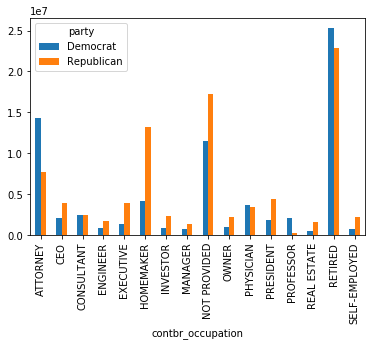

In [23]:
over_2mm.plot(kind='bar')


In [24]:
# 由于职业和雇主的处理非常相似，我们定义函数get_top_amounts()对两个字段进行分析处理
def get_top_amounts(group, key, n=5):
    # 传入groupby分组后的对象，返回按照key字段汇总的排序前n的数据
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.sort_values(ascending=False)[:n]


grouped = data_vs.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)


cand_nm        contbr_occupation
Obama, Barack  RETIRED              25270707.23
               ATTORNEY             14286324.84
               NOT PROVIDED         11527233.18
               HOMEMAKER             4243394.30
               PHYSICIAN             3732387.44
               CONSULTANT            2459812.71
               PROFESSOR             2163571.08
Romney, Mitt   RETIRED              11266949.23
               NOT PROVIDED         10149806.16
               HOMEMAKER             8037250.86
               ATTORNEY              5310284.02
               PRESIDENT             2403439.77
               CEO                   2247242.03
               EXECUTIVE             2230653.79
Name: contb_receipt_amt, dtype: float64

In [25]:
# 同样的，使用get_top_amounts()对雇主进行分析处理
grouped = data_vs.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_employer', n=7)


cand_nm        contbr_employer
Obama, Barack  RETIRED            22666102.20
               SELF-EMPLOYED      18584277.16
               NOT PROVIDED       11685409.89
               NOT EMPLOYED        8584118.70
               HOMEMAKER           2599987.04
               STUDENT              318831.45
               VOLUNTEER            257104.00
Romney, Mitt   RETIRED            11264701.35
               NOT PROVIDED       10824257.44
               HOMEMAKER           8037000.86
               SELF-EMPLOYED       7265136.53
               STUDENT              488642.82
               CREDIT SUISSE        265650.00
               MORGAN STANLEY       262266.00
Name: contb_receipt_amt, dtype: float64

In [26]:
# labels是之前赞助金额离散化后的Series
grouped_bins = data_vs.groupby(['cand_nm', labels])
grouped_bins.size().unstack(0)


cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153992.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [27]:
bucket_sums = grouped_bins['contb_receipt_amt'].sum().unstack(0)
bucket_sums


cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798731.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


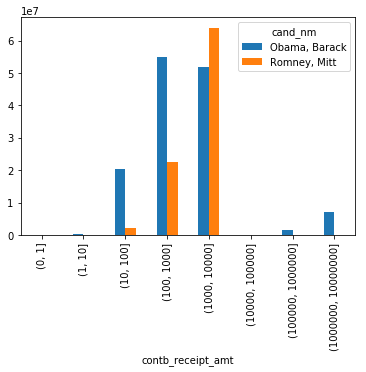

In [28]:
# Obama、Romney各区间赞助总金额
bucket_sums.plot(kind='bar')

In [29]:
# 算出每个区间两位候选人收到赞助总金额的占比
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710177,0.289823
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


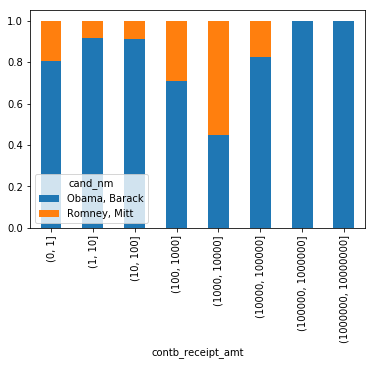

In [30]:
# 使用柱状图，指定stacked=True进行堆叠，即可完成百分比堆积图
normed_sums.plot(kind='bar', stacked=True)


In [31]:
# 按照赞助人姓名分组计数，计算重复赞助次数最多的前20人
data.groupby('contbr_nm')['contbr_nm'].count().sort_values(ascending=False)[:20]

contbr_nm
SEBAG, DAVID             267
WILLIAMS, DEBBY          205
BERKE, DAVID MICHAEL     171
CASPERSON, CAROLINA      167
FALLSGRAFF, TOBY         152
SMITH, ERIK              145
SKINNER, DONNA           136
HARRIS, CLAUDIA W.       134
POTTS, LILLIE            115
ROSBERG, MARILYN         115
DFHDFH, DFHDFH           113
DUDLEY, DEBBIE           111
HAUGHEY, NOEL ANTHONY    107
RUSH, KYLE                96
SMITH, CHARLES            95
SHERWIN, GLEN R.          94
MITCHELL, CAITLIN         90
KARIMIAN, AFSANEH         88
NURU, ISAAC               87
BIRMINGHAM, TOM           85
Name: contbr_nm, dtype: int64